## Analysis of spatial expression data

The gene expression matrices have already undergone preprocessing and normalisation.
Therefore, we do the following analysis steps:

- Dimensionality reduction, clustering and visualisation
- Identification of highly variable genes


Select dataset - can be one of `dataset_1`, `dataset_2`, `dataset_3`

In [1]:
dataset = 'dataset3'

Module imports

In [2]:
import scanpy as sc
import phenograph
import numpy as np
import pandas as pd

Data import

In [3]:
# Gene expression matrix
gex_res = pd.read_csv(f'../reproduce_data/{dataset}/gex_res.csv', index_col=0)
tensionmap_data = pd.read_csv(f'../reproduce_data/{dataset}/tensionmap_res.csv', index_col=0)

Dimensionality reduction and visualisation

In [4]:
# Convert data to AnnData format
adata = sc.AnnData(gex_res.T)
adata.obs['celltype'] = tensionmap_data['celltype'].values

/var/folders/tf/dxng8s6d0r71m3ynlsc4pw4r0000gn/T/ipykernel_86743/3132757547.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(gex_res.T)


In [5]:
# PCA and UMAP
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)

/Users/ruiyanghe/opt/anaconda3/envs/tensionmap-new/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ruiyanghe/opt/anaconda3/envs/tensionmap-new/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ruiyanghe/opt/anaconda3/envs/tens

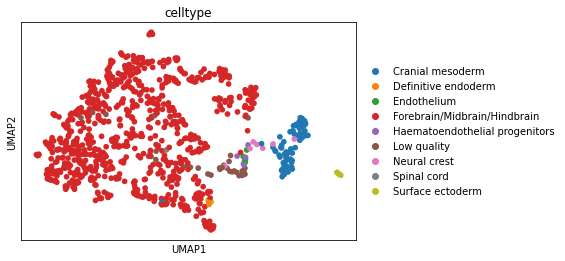

In [6]:
# Visualise UMAP coloured by celltype annotations from Lohoff et al., 2022

sc.pl.umap(adata, color='celltype')

Clustering with Phenograph

In [7]:
gex_labels,_,_ = phenograph.cluster(pd.DataFrame(adata.obsm['X_pca']))
adata.obs['phenograph_clusters'] = pd.Categorical(gex_labels)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.03615903854370117 seconds
Jaccard graph constructed in 3.2327749729156494 seconds
Wrote graph to binary file in 0.015163898468017578 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.791448
After 5 runs, maximum modularity is Q = 0.795613
Louvain completed 25 runs in 0.7473196983337402 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 5.941766977310181 seconds


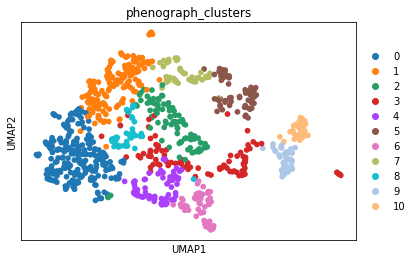

In [8]:
sc.pl.umap(adata, color='phenograph_clusters')

Select highly variable genes

In [9]:
sc.pp.filter_genes(adata, min_cells = (tensionmap_data.shape[0]/2))
sc.pp.highly_variable_genes(adata, inplace=True, n_top_genes=3000, flavor='seurat_v3', check_values=False)
var_genes = adata.var.loc[adata.var['highly_variable']].index.values

In [10]:
# Save list of highly variable genes - this will be required in later step

np.savetxt(f'./temp_data/highly_variable.txt', var_genes, fmt='%s')